# APMA E4990 HW3    
# Name: Zihan Yi   UNI: zy2292

## 1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [180]:
# Necssary libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
#from mpl_toolkits.basemap import Basemap
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random

In [181]:
df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv' , index_col=0)
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


## 2) Convert `default` and `student` to categorical variables.

In [182]:
df['default'] = pd.get_dummies(df['default'])['Yes']
df['student'] = pd.get_dummies(df['student'])['Yes']
df.head()

,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879


## 3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

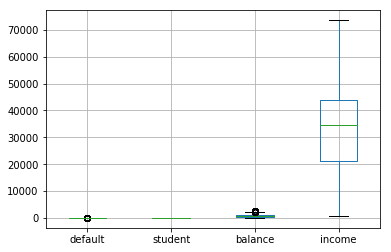

In [183]:
# boxplots
df.boxplot()
plt.show()

/Users/Zihan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


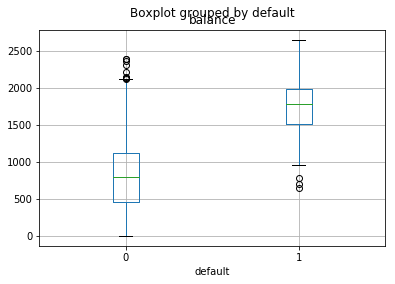

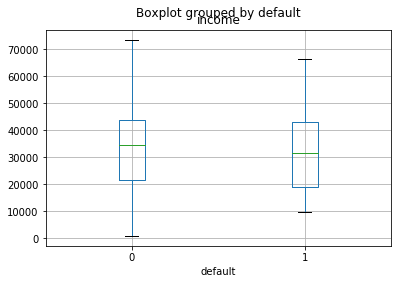

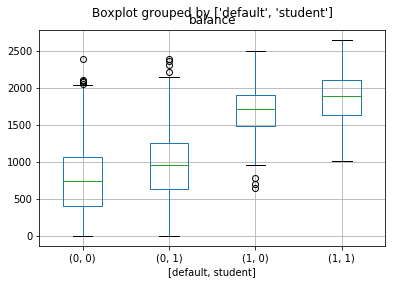

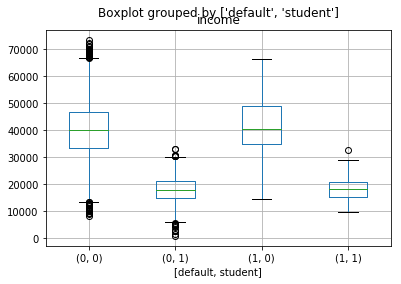

In [184]:
df.boxplot(column='balance',by='default')
df.boxplot(column='income',by='default')
df.boxplot(column='balance',by=['default','student'])
df.boxplot(column='income',by=['default','student'])

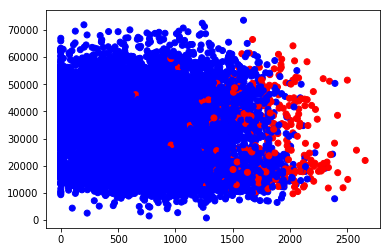

In [185]:
# scatter plot
colors = df['default'].replace({0:'Blue',1:'Red'}) #label red if yes and blue if no
plt.scatter(df['balance'], df['income'], color=colors)
plt.show()

## 4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

In [186]:
np.random.seed(2292)
df_r=df.sample(frac=1.0)
# shuffle the rows
y_r=df_r['default']
X_r=df_r[['balance','income']]
size = len(df_r.index)

# Split the data into training/testing sets
X_train = X_r[0:int(size*0.8)]
X_test = X_r[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y_r[0:int(size*0.8)]
y_test = y_r[int(size*0.8):]

In [187]:
regr=LogisticRegression(penalty='l1')
regr.fit(X_train, y_train)
coef=regr.coef_[0]
coef

array([  5.26029072e-03,   2.14911888e-05])

In [188]:
intercept=regr.intercept_
intercept

array([-10.93075782])

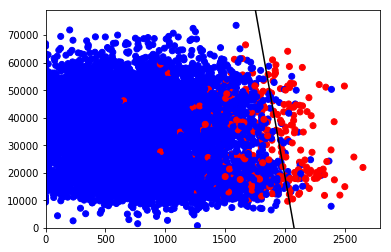

In [189]:
regr=LogisticRegression(penalty='l1')
regr.fit(X_train, y_train)

x=np.arange(0, 3000, 1)
y_pred=-(intercept+coef[0]*x)/coef[1]


# plot the decision boundary
plt.scatter(df['balance'], df['income'], c=colors)
plt.plot(x, y_pred, c='black')
plt.xlim(0,2800)
plt.ylim(0, 79000)
plt.show()

In [190]:
X=df[['balance','income']]
y=df['default']

### the following two functions are from the given handout
# Computes the AUC ROC of the classifier.
def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    # Construct training and testing set.
    X, y = shuffle(X, y, random_state=random_state)
    n_samples, n_features = X.shape
    half = int(n_samples/1.2)
    X_train, X_test = X[:half], X[half:]
    y_train, y_test = y[:half], y[half:]
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Generate ROC  for LR with l1 penalty and C=0.1
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Compute AUC
# generate_auc(X,y,LogisticRegression,penalty='l1')

Area under the ROC curve : 0.959761


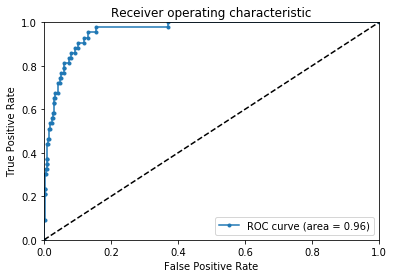

In [191]:
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

##  5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking of coefficients.  How does performance improve with the added variable?

Area under the ROC curve : 0.962295


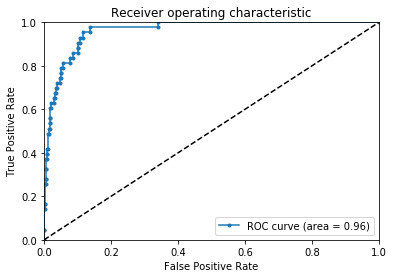

In [192]:
X2=df[['balance','income','student']]
y2=df['default']

fpr,tpr,roc_auc, thresholds = generate_auc(X2,y2,LogisticRegression,penalty='l1')
generate_ROCplot(fpr,tpr,'LR',roc_auc)

In [193]:
np.random.seed(2292)

df_r=df.sample(frac=1.0)
# shuffle the rows
y2_r=df_r['default']
X2_r=df_r[['balance','income','student']]

scaler=StandardScaler()
X2_r=scaler.fit_transform(X2_r)

size = len(df_r.index)

# Split the data into training/testing sets
X2_train = X2_r[0:int(size*0.8)]
X2_test = X2_r[int(size*0.8):]

# Split the targets into training/testing sets
y2_train = y2_r[0:int(size*0.8)]
y2_test = y2_r[int(size*0.8):]

In [194]:
alphas=np.logspace(-5, -1, 30)
score=[]

### from handout
for alpha in alphas: 
    regr2 = Ridge(alpha=alpha)
    regr2.fit(X2_train, y2_train)
    score.append(regr2.score(X2_test, y2_test))
alpha_best = alphas[np.argmax(score)]

regr3 = LogisticRegression(penalty = "l1", C = alpha_best)
lgr.fit(X_train, y_train)

clf = Ridge(alpha=alpha_best)
clf.fit(X2_train, y2_train)
print ('The coefficients:', clf.coef_)

The coefficients: [ 0.06408368  0.00652366 -0.00253626]


[Text(0,0,'balance'), Text(0,0,'income'), Text(0,0,'student')]

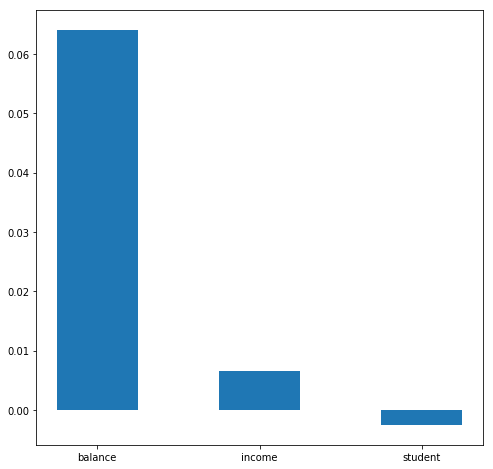

In [195]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.bar(np.arange(3), clf.coef_, .5)
ax.set_xticks(np.arange(3))
ax.set_xticklabels(('balance', 'income','student'))

As there is no significant increase in area under ROC curve after adding the variable, and the ranking of student is low, we conclude that the there is no significant improvement in performance.

## 6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

Area under the ROC curve : 0.969767


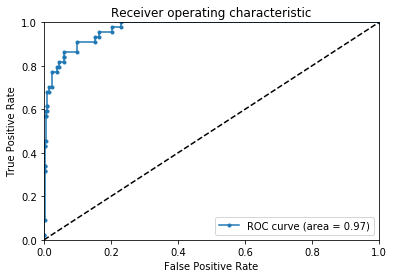

The ROC curve for random state is: 1
Area under the ROC curve : 0.945168


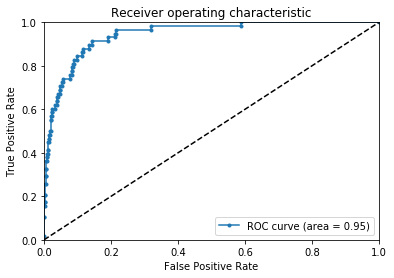

The ROC curve for random state is: 2
Area under the ROC curve : 0.943609


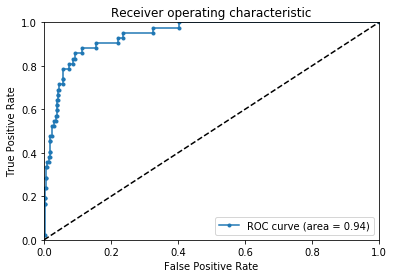

The ROC curve for random state is: 3
Area under the ROC curve : 0.966742


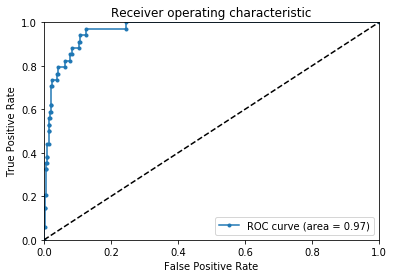

The ROC curve for random state is: 4
Area under the ROC curve : 0.950759


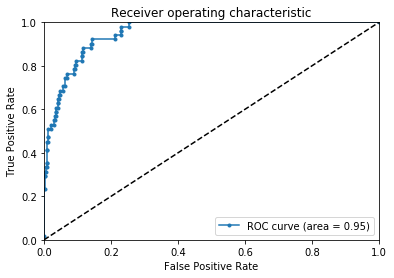

The ROC curve for random state is: 5
Area under the ROC curve : 0.958580


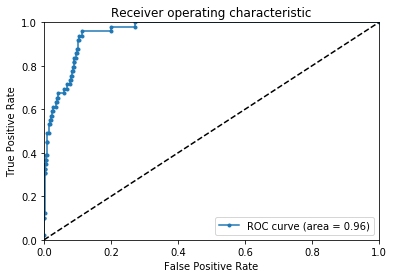

The ROC curve for random state is: 6
Area under the ROC curve : 0.950142


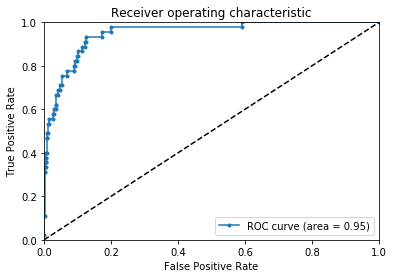

The ROC curve for random state is: 7
Area under the ROC curve : 0.937342


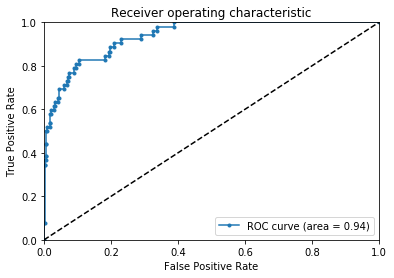

The ROC curve for random state is: 8
Area under the ROC curve : 0.931096


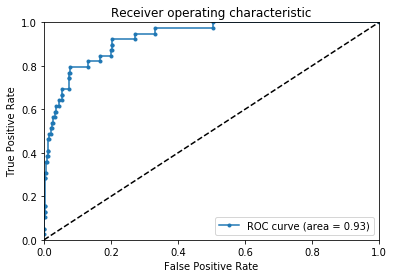

The ROC curve for random state is: 9
Area under the ROC curve : 0.959853


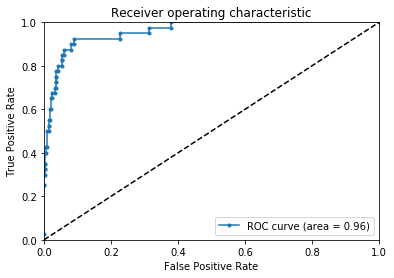

The ROC curve for random state is: 10


In [196]:
for rs in range(1,11):
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=rs)
    clf = LogisticRegression(penalty='l1', C=alpha_best)
    clf.fit(X2_train, y2_train)  
    fpr,tpr,roc_auc, thresholds = generate_auc(X2_train,y2_train,LogisticRegression,penalty='l1')
    generate_ROCplot(fpr,tpr,'LR',roc_auc)
    print("The ROC curve for random state is:", rs)

In [197]:
scores = cross_val_score(regr3, X2_train, y2_train, cv = 5)
print(scores)

[ 0.971875  0.97125   0.9725    0.97375   0.971875]


The model we built in (5) is robust, as the five scores above are very close and high.

## 7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

In [198]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

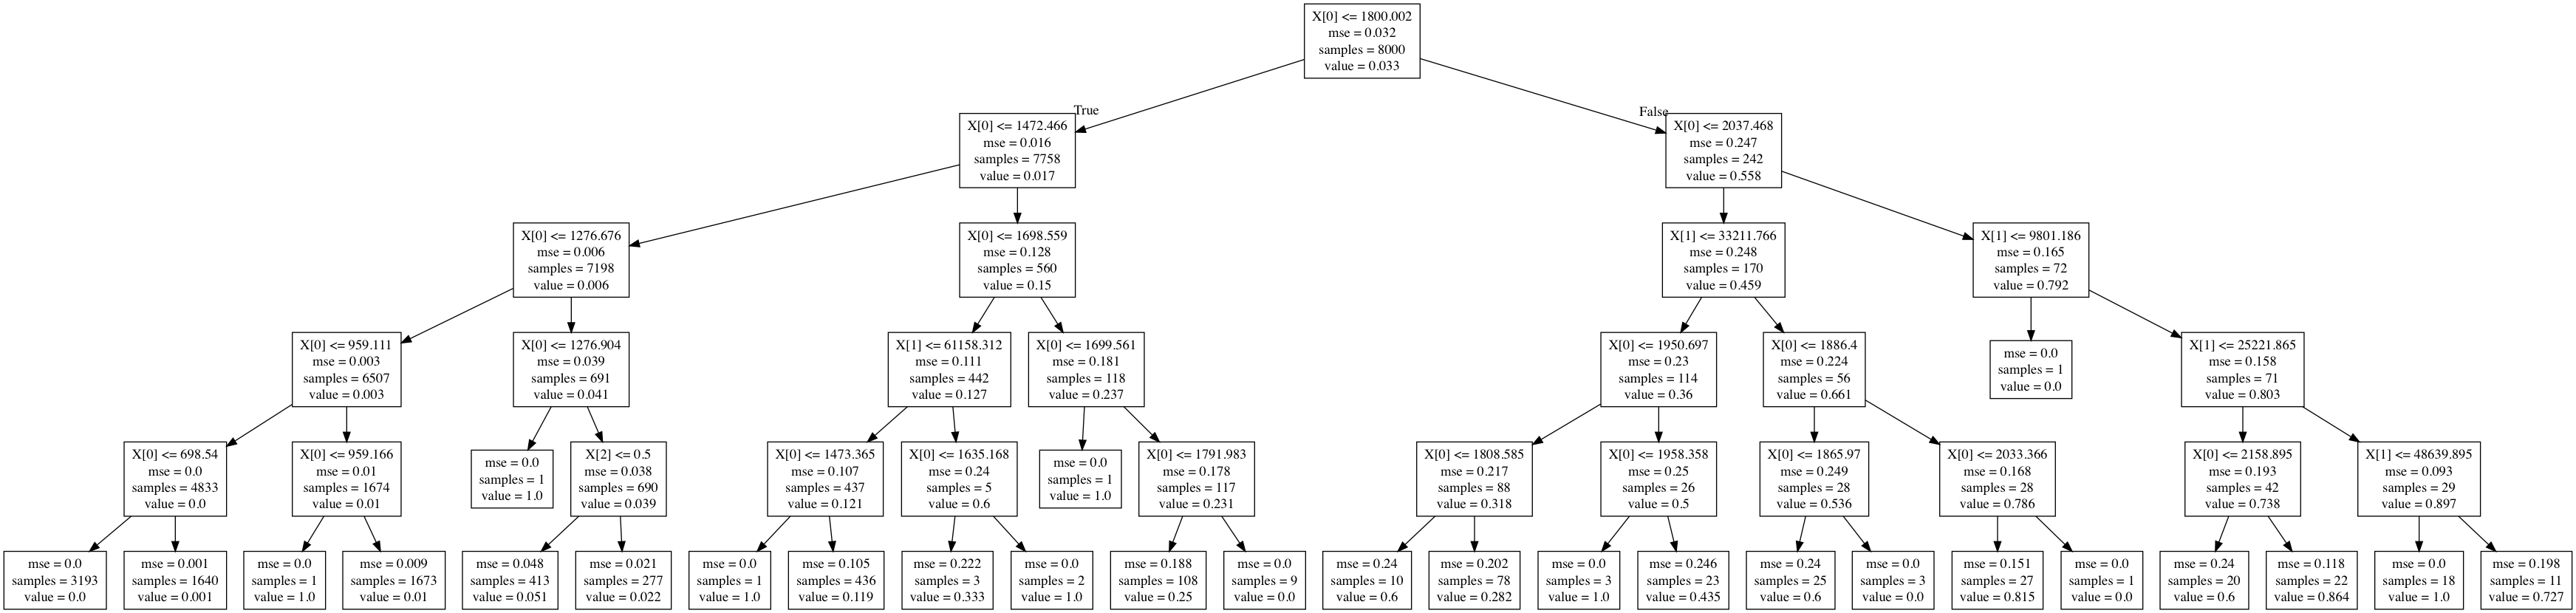

In [199]:
from sklearn.tree import DecisionTreeRegressor
import pydotplus
from IPython.display import Image 
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Fit Regression Model
regrtree = DecisionTreeRegressor(max_depth=5)
regrtree.fit(X2_train, y2_train)

dt=DecisionTreeRegressor(max_depth=5)
visualize_tree(regrtree, feature_names=['x'])

dot_data=export_graphviz(regrtree, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

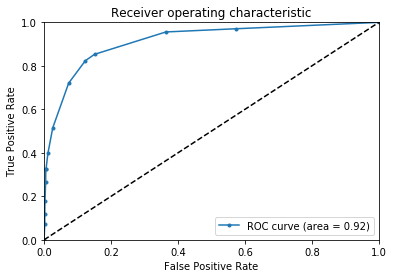

In [200]:
y2_pred = regrtree.predict(X2_test)
fpr, tpr, thresholds = roc_curve(y2_test, y2_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

The preformance of the previous logistic regression model is a little bit better.

## 8) Find the optimal decision tree depth and compute the AUC ROC. 

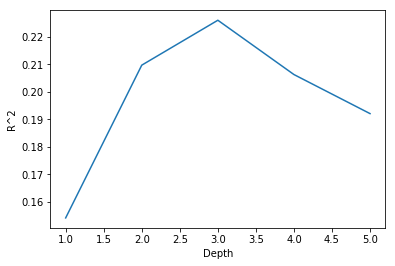

In [201]:
# from the given handout
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
train_errors=[]
test_errors=[]
scores=[]
depths = range(1,6)
for n in depths:
    regr = DecisionTreeRegressor(max_depth=n)
    # Train the model using the training sets
    regr.fit(X2_train, y2_train)
    train_errors.append(regr.score(X2_train,y2_train))
    scores.append(regr.score(X2_test,y2_test))
plt.ylabel('R^2')
plt.xlabel('Depth')
plt.plot(depths,scores)
test_errors=scores
n_opt=depths[np.argmax(scores)]

The optimal decision tree depth is 3 according to the output above.

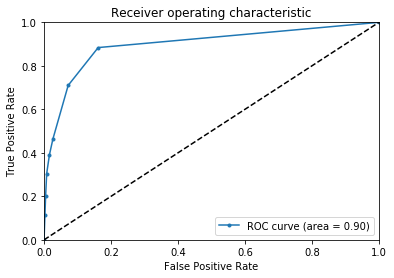

In [202]:
regr_opt = DecisionTreeRegressor(max_depth=n_opt)
regr_opt.fit(X2_train, y2_train)

y_0 = regr_opt.predict(X2_test)

fpr, tpr, thresholds = roc_curve(y2_test, y_0)
roc_auc = auc(fpr, tpr)
generate_ROCplot(fpr,tpr,'Decision Tree', roc_auc)

The AUC is 0.90, which is less than the AUC of logistic regression. It implies that the preformance of logistic regression is better.